# MLOps: Automation and Continuous Delivery Pipelines in Machine Learning

In this notebook, I discuss the design of aa MLOPs executed in the Google Cloud Platform, for implementing and automating Continuous Integration (CI), Continuous Delivery (CD), and Continuous Training (CT) for machine learning (ML) systems in a company with specific requirements. To give a wide explanation we will suppose different MLOps levels according to the maturate stage of the project.

Requirements:
- The company has ~20 to 50 ML models running
- The company has around 100.000 users monthly

Levels:
- MLOps level 0: Manual process
- MLOps level 1: ML pipeline automation
- MLOps level 2: CI/CD pipeline automation

---

# GCP had created VERTEX AI 
### Thats why is important to use GCP - VERTEX AI (All requried for MLops in just one platform)

Vertex AI is a managed MLOps platform that helps you build, deploy, and scale machine learning models faster and more efficiently. It provides a unified experience for managing the entire ML lifecycle, from data preparation to model monitoring. Vertex AI also offers a wide range of features that help you solve common MLOps challenges, such as:

- Data preparation: Vertex AI provides a variety of tools to help you prepare your data for ML, including data cleaning, data augmentation, and feature engineering.
- Model training: Vertex AI offers a variety of machine learning frameworks and hyperparameter tuning algorithms to help you train your models efficiently.
- Model deployment: Vertex AI provides a variety of deployment options, including batch inference, online inference, and streaming inference.
- Model monitoring: Vertex AI provides a variety of tools to help you monitor the performance of your models in production, including metrics, alerts, and explainability.
- Model governance: Vertex AI provides a variety of tools to help you govern your ML models, including access control, auditing, and compliance.
By using Vertex AI, you can focus on building great ML models and let Vertex AI handle the rest.

Here are some additional benefits of using Vertex AI:

- Scalability: Vertex AI is designed to scale to meet the needs of any ML project, from small to large.
- Cost-effectiveness: Vertex AI is a cost-effective way to build, deploy, and scale ML models.
- Security: Vertex AI is a secure platform that meets the needs of any organization.




---
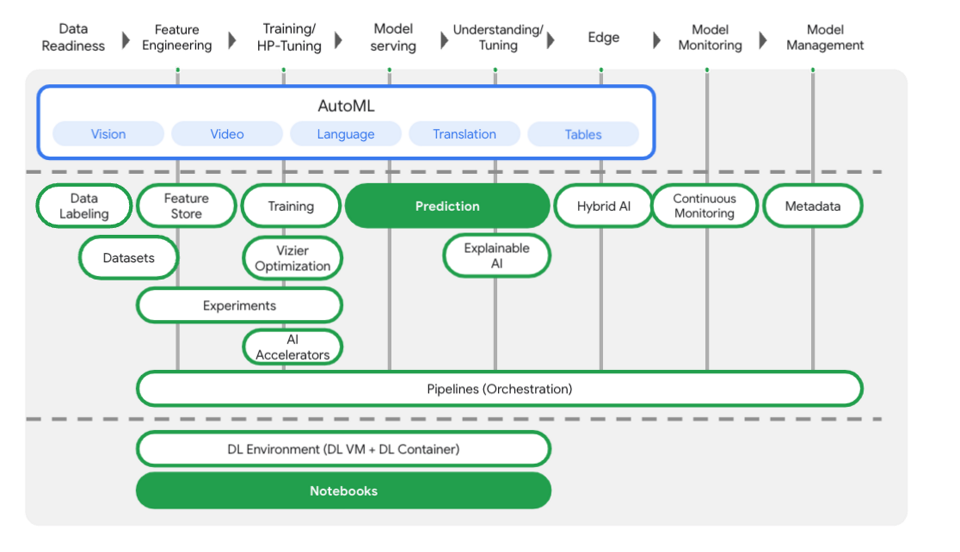


## Main technological assumptions of the implementation.
- All infrastructure is on GCP
- Unlimited budget
- Each model runs on a standalone Vertex AI endpoint for inference.
- Each of model is accessed through the endpoint API of a model deployed on Vertex AI
- All the data engineering has been done to obtain clean data for any given model and store it in BigQuery or Google Cloud Storage.

<!--  
# Technologies for Vertex AI Model Deployment

## Inference Scalability

* Vertex AI provides a variety of options for scaling inference, including using GPUs, TPUs, or Cloud TPU Pods.
* GPUs are good for general-purpose inference, while TPUs are specifically designed for machine learning inference.
* Cloud TPU Pods are a scalable and cost-effective option for high-performance inference.

## Machine Learning CI/CD

* Vertex AI provides a comprehensive CI/CD pipeline that can be used to automate the development, testing, and deployment of machine learning models.
* This pipeline can help to ensure that models are consistently deployed and that any changes to the model are tested and validated before they are deployed.

## Model Validation

* Vertex AI provides a variety of tools for validating machine learning models.
* These tools can be used to assess the accuracy and performance of models, as well as to identify potential problems such as data drift and model drift.

## Data Versioning

* Vertex AI provides a built-in data versioning system that can be used to track changes to data over time.
* This can be helpful for identifying and tracking the impact of changes to data on machine learning models.

## Model Continuous Training

* Vertex AI provides a variety of tools for continuous training of machine learning models.
* These tools can be used to automatically retrain models as new data becomes available.
* This can help to ensure that models are always up-to-date and that they continue to perform well as the data changes.

## Other considerations

* Model monitoring: It is important to monitor the performance of machine learning models in production. This can be done by collecting metrics such as accuracy, latency, and throughput.
* Model explainability: It is important to be able to explain how machine learning models make decisions. This can be helpful for debugging models, as well as for communicating with stakeholders about how the models work.
* Model security: It is important to secure machine learning models in production. This includes protecting the models from unauthorized access, as well as from data poisoning attacks.

By considering all of these factors, you can increase the chances of success when deploying machine learning models in production. -->


 

# ML Ops Design

## Assumption 1. MLOps level 0: Manual process
For this case we will keep the two company requirements (The company has ~20 to 50 ML models running, The company has around 100.000 users monthly). For this maturity level all processes to compile and then implement an ML model is manual in its entirety.
### Considerations
> - The company has multiple static models in operation. For example, consider models that classify objects using a standard camera. These models may encounter technological changes every 5 years. As an illustration, let's consider the classification between coffee beans and cocoa beans. Despite any technological advancements, coffee beans and cocoa beans continue to exhibit distinct physical characteristics over a short period of time.
### Characteristics


> - Each step is manual, including data analysis, data preparation, model training and validation. Execution of each step and transition from one step to another is required, both manually. A data scientist usually controls this process through experimental code that he or she writes and runs on notebooks, interactively, until a viable model is produced.
> - Data scientists deliver a trained model as an artifact to the engineering team, which will need to implement it into the API infrastructure.
> - Infrequent version iterations. A new model version is rolled out only a couple of times a year.
> - No CI: Because few changes are expected in the implementation, the CI is ignored. Testing code is usually part of running notebooks or scripts.
> - No CD: Because there are not frequent model release deployments, the CD is ignored.
> - The model deployment only generates the Vertex AI Deploy model API.
> - Being a static model, it does not require exhaustive supervision (The coffee bean continues to be physically different from the cocoa bean.)
> - Model TC in production: the model is trained in production automatically with recent data based on active pipeline triggers, which are discussed in the next section.

### Pipeline Triggers 

> - On-demand: Manual execution of the pipeline as needed.

### Architecture



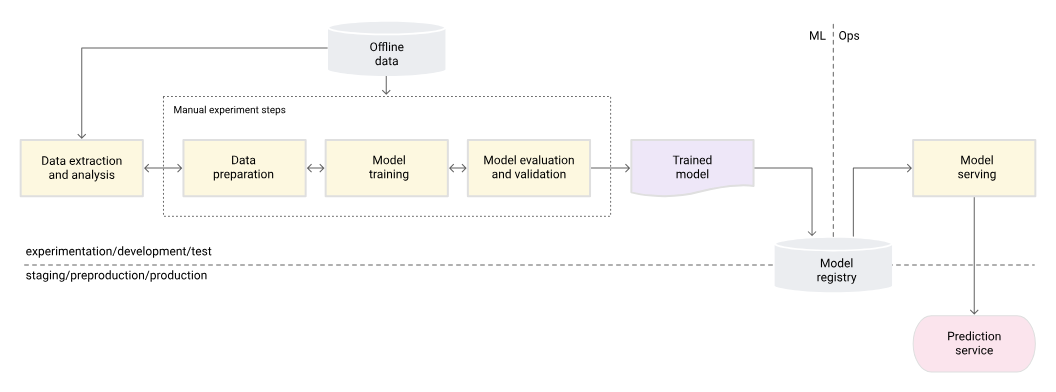



---


## Assumption 2. MLOps level 1: ML pipeline automation

### Considerations

The company has between 20 and 50 models running with over 100,000 users. In this case you can apply multiple cases we can assume multiple cases of Fraud Detection System for each of the company's virtual trading products. Since the pipeline is not deployed frequently, the pipeline and its components are tested manually.

### Characteristics
>- Rapid experiment: Automate ML experiment steps for faster iteration and readiness for production.
>- Continuous training (CT) of the model in production: Automatically train the model using fresh data triggered by the live pipeline.
>- Experimental-operational symmetry: Utilize the same pipeline implementation across development, preproduction, and production environments.
>- Modularized code for components and pipelines: Create reusable and shareable components for constructing ML pipelines, with containerization for decoupling execution environments and ensuring reproducibility.
>- Continuous delivery of models: Continuously deliver prediction services by automating the deployment of new models trained on fresh data.
>- Pipeline deployment: Deploy the entire training pipeline instead of just the trained model, enabling automatic and recurring runs to serve as the prediction service.

### Pipeline Triggers 

> - On demand: Manually execute the pipeline when needed.
> - On a schedule: Systematically provide new labeled data to the ML system at regular intervals (daily, weekly, or monthly) with the retraining frequency based on data pattern changes and cost considerations.
> - On availability of new training data: Access new data for training on an ad-hoc basis as it becomes available in the source databases.
> - On model performance degradation: Retrain the model when noticeable performance degradation occurs.
> - On significant changes in data distributions (concept drift): Detect significant changes in the data distributions used for prediction, indicating the model has become outdated and requires retraining on fresh data.

### Challenges
In a scenario where frequent pipeline deployments are not required and only a few pipelines are managed, manual testing and deployment of the pipeline and its components is typically performed. The tested source code is then submitted to the IT team for deployment in the target environment. This approach is suitable when deploying new models based on new data rather than new ML ideas.

However, when there is a need to explore new ML ideas and deploy implementations of ML components rapidly, and when managing multiple ML pipelines in production, a CI/CD setup becomes necessary. This setup automates the build, test, and deployment processes for ML pipelines.

### Architecture

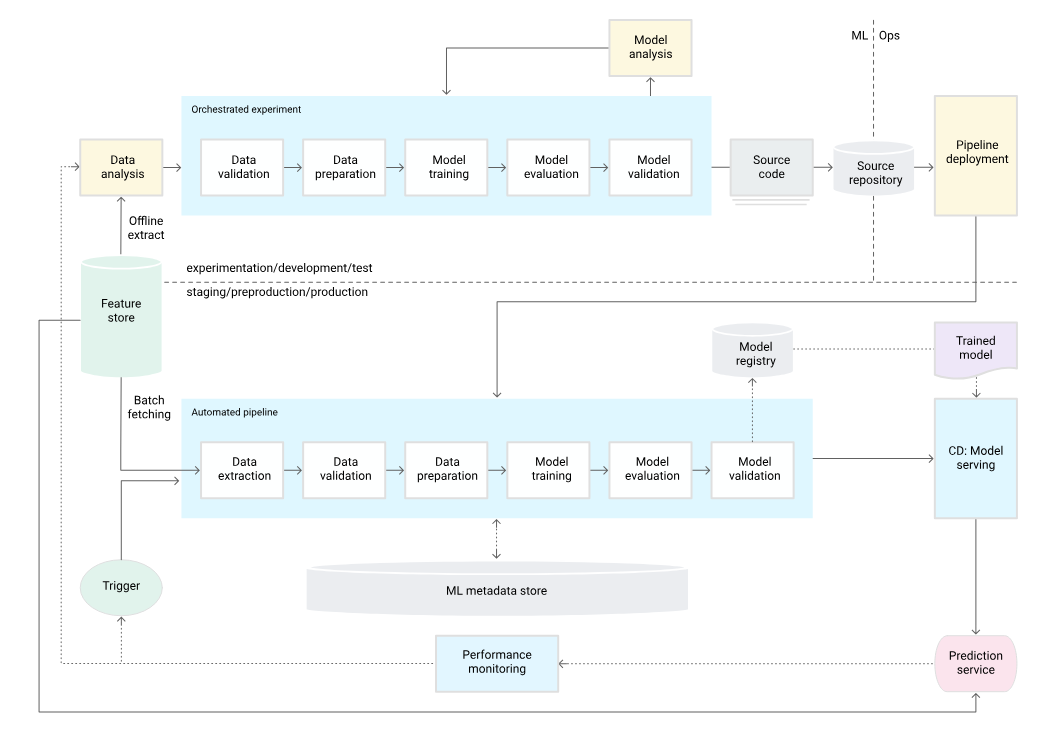



---


## Assumption 3. MLOps level 2: CI/CD pipeline automation

### Considerations
The company is a large financial services company that uses machine learning to power a variety of applications, including fraud detection, risk assessment, and customer segmentation. The company has a team of data scientists who are responsible for developing and maintaining the company's machine learning models.
### Characteristics 
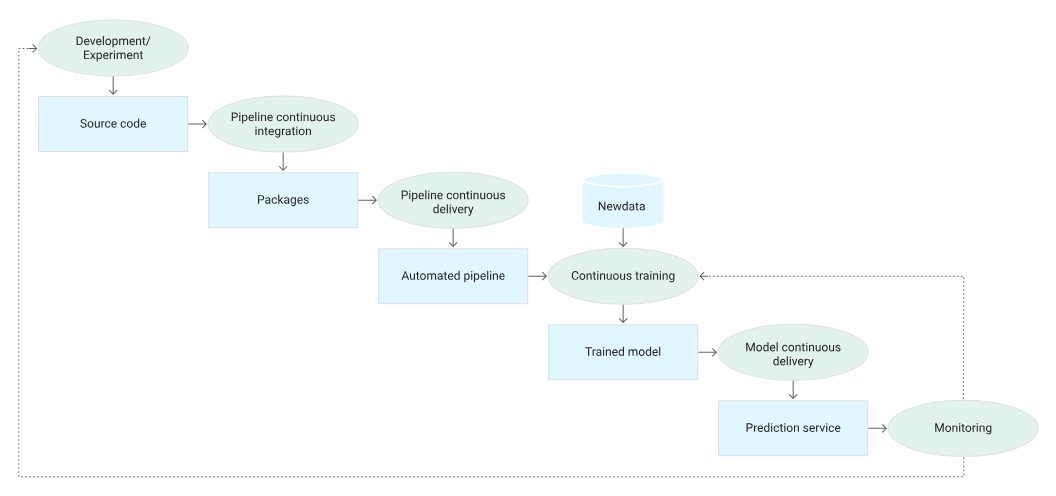

The pipeline consists of the following stages:

>- Development and experimentation
>- Pipeline continuous integration
>- Pipeline continuous delivery
>- Automated triggering
>- Model continuous delivery
>- Monitoring
>- The data analysis step is still a manual process.
### Challenges
The company's data scientists were facing a number of challenges, including:

>- The company's machine learning models were becoming increasingly complex, making it difficult to develop and maintain them.
>- The company's machine learning models were not being deployed in a timely manner, which was impacting the company's ability to deliver value to its customers.
>- The company's machine learning models were not being monitored effectively, which was increasing the risk of model drift and other problems.

### Solution
The company decided to implement Vertex AI to address these challenges. Vertex AI is a managed MLOps platform that provides a unified experience for managing the entire ML lifecycle, from data preparation to model monitoring. Vertex AI includes a number of features that help to address the challenges that the company was facing, including:

>- Managed infrastructure: Vertex AI provides a managed infrastructure that includes compute, storage, and networking resources. This frees up the company's data scientists to focus on developing and maintaining machine learning models.
>- Automated machine learning: Vertex AI provides a number of automated machine learning tools that can help the company's data scientists to develop and deploy machine learning models more quickly and easily.
>- Model monitoring: Vertex AI provides a number of tools that can help the company to monitor its machine learning models for accuracy, performance, and bias.

### Results

Since implementing Vertex AI, the company has seen a number of benefits, including:

>- The company's machine learning models are now more complex and accurate.
>- The company's machine learning models are now being deployed in a timely manner.
>- The company's machine learning models are now being monitored effectively.

As a result of these benefits, the company has been able to improve the value that it delivers to its customers.
### Pipeline Triggers 
Continuous integration (CI) automates the building, testing, and packaging of the pipeline when new code is added or updated. It includes tests like unit testing for individual pipeline components, model training testing to ensure proper functioning, artifact testing for expected outputs, and integration testing for component interaction.

Continuous delivery (CD) continuously deploys new pipeline versions to the target environment for delivering prediction services with the updated model. It involves steps such as verifying compatibility with the infrastructure, testing the prediction service and its performance, validating data quality, ensuring model performance meets requirements, and deploying to test, pre-production, and production environments.

In summary, CI focuses on automating pipeline building and testing, while CD emphasizes efficient and reliable deployment, ensuring compatibility, reliability, and performance of the prediction services.

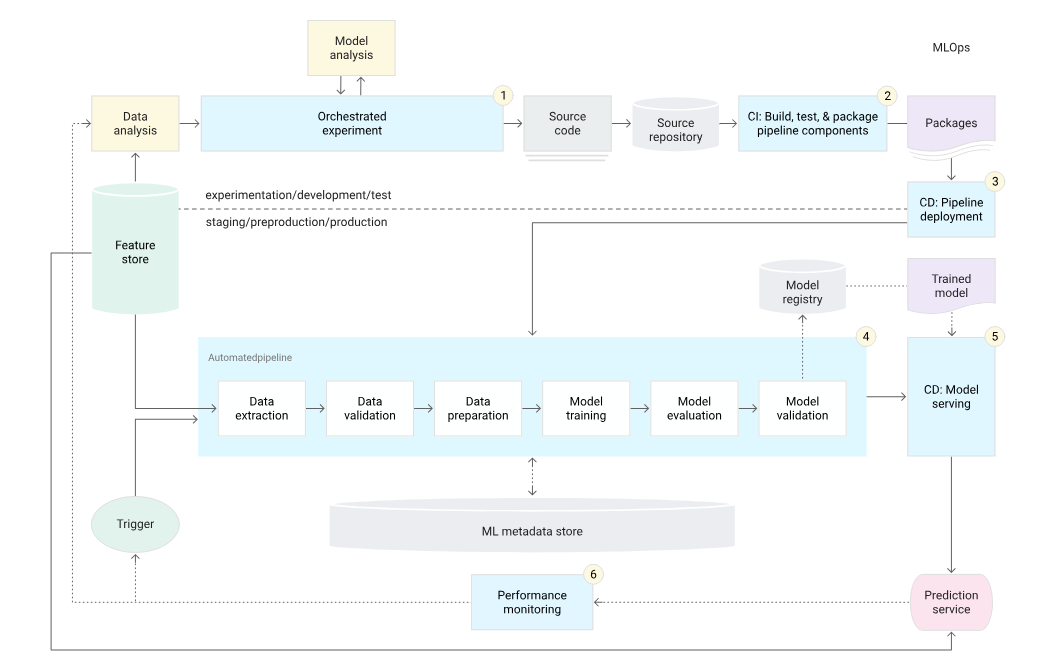